In [1]:
print("GRACE - Team Precision")

GRACE - Team Precision


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-4/Data-dictionary.xlsx
/kaggle/input/data-storm-4/DataStorm4.0_KaggleProblemStatement.pdf
/kaggle/input/data-storm-4/Store-info.csv
/kaggle/input/data-storm-4/Testing-data.csv
/kaggle/input/data-storm-4/Historical-transaction-data.csv


In [3]:
df_store_info = pd.read_csv('/kaggle/input/data-storm-4/Store-info.csv')
df_transactions = pd.read_csv('/kaggle/input/data-storm-4/Historical-transaction-data.csv')


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df_store_info

shop_id  shop_area_sq_ft shop_profile
0    SHOP047              528     Moderate
1    SHOP009              676         High
2    SHOP083              676          Low
3    SHOP117              676          Low
4    SHOP042              676          Low
..       ...              ...          ...
119  SHOP087              527          NaN
120  SHOP050              411          NaN
121  SHOP061              699          NaN
122  SHOP056              597          NaN
123  SHOP070              676          NaN

[124 rows x 3 columns]

In [6]:
df_transactions.head(100)

item_description          transaction_date  invoice_id customer_id  \
0      ORANGE BARLEY 1.5L  2021-12-11T00:00:00.000Z       147.0        BGXA   
1        GINGER BEER 1.5L  2021-10-17T00:00:00.000Z       371.0        IA25   
2         TONIC PET 500ML  2021-12-13T00:00:00.000Z       484.0        VN7V   
3           CREAM SODA 1L  2021-12-13T00:00:00.000Z       484.0        VN7V   
4   STRAWBERRY MILK 180ML  2021-10-23T00:00:00.000Z      1310.0        7S00   
..                    ...                       ...         ...         ...   
95        FIT O ORANGE 1L  2021-11-06T00:00:00.000Z     31116.0        F0XM   
96       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
97       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
98       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
99       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   

    shop_id  item_price  quantity_sold  
0   SHOP008         220              2  
1   SHOP112         220              2  
2   SHOP008         160              2  
3   SHOP008         150              2  
4   SHOP112         210              5  
..      ...         ...            ...  
95  SHOP087         290              1  
96  SHOP022         100              1  
97  SHOP022         100              2  
98  SHOP022         100              2  
99  SHOP022         100              1  

[100 rows x 7 columns]

## Analysing the Transaction Data 

In [7]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473974 entries, 0 to 473973
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  438046 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 25.3+ MB


In [8]:
df_transactions.isnull()


item_description  transaction_date  invoice_id  customer_id  shop_id  \
0                  False             False       False        False    False   
1                  False             False       False        False    False   
2                  False             False       False        False    False   
3                  False             False       False        False    False   
4                  False             False       False        False    False   
...                  ...               ...         ...          ...      ...   
473969             False             False        True        False    False   
473970             False             False        True        False    False   
473971             False             False        True        False    False   
473972             False             False        True        False    False   
473973             False             False        True        False    False   

        item_price  quantity_sold  
0            False          False  
1            False          False  
2            False          False  
3            False          False  
4            False          False  
...            ...            ...  
473969       False          False  
473970       False          False  
473971       False          False  
473972       False          False  
473973       False          False  

[473974 rows x 7 columns]

## Handling Missing Values

<AxesSubplot:>

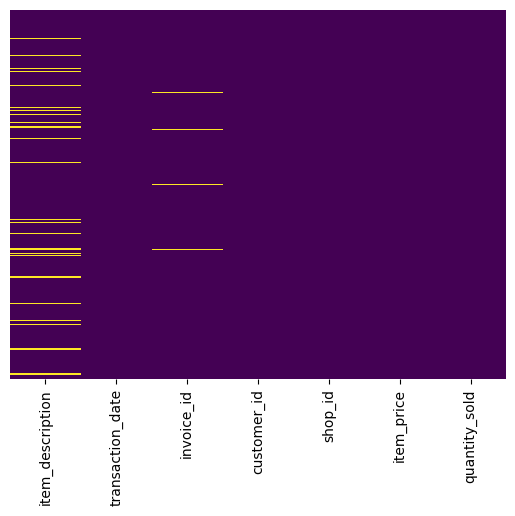

In [9]:
sns.heatmap(df_transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [10]:
df_transactions['item_description'] =  df_transactions['item_description'].fillna("No Product")

<AxesSubplot:>

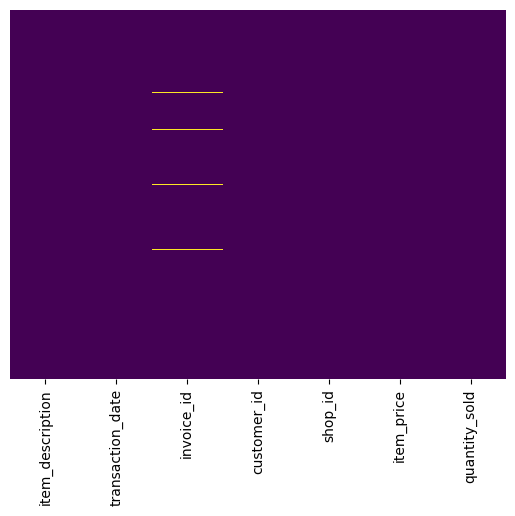

In [11]:
sns.heatmap(df_transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Here we can see that the item_description column and the invoice_id columsn are the ones that are missing data

## Remove The outliers Accordingly 

In [12]:
print(df_transactions['item_price'].value_counts())
print(df_transactions['item_description'].value_counts())
print(df_transactions['transaction_date'].value_counts())

220     140903
100      56189
150      43256
70       39467
290      21553
         ...  
1495         1
2205         1
2250         1
4970         1
1020         1
Name: item_price, Length: 209, dtype: int64
GINGER BEER 1.5L                59864
CREAM SODA 1.5L                 39608
No Product                      35928
CREAM SODA 500ML                34320
GINGER BEER 1L                  26808
ORANGE BARLEY 1.5L              23180
NECTO 1.5L                      21746
SODA 500ML                      16802
BOTTLED DRINKING WATER 500ML    15786
SODA PET 1.5L                   15652
FIT O ORANGE 1L                 15392
LEMONADE 1.5L                   13433
SODA 1L                         13151
TONIC PET 500ML                 12704
GINGER BEER 500ML               11939
CREAM SODA APPLE POP 1L         11736
FIT O ORANGE 200ML               9490
BOTTLED DRINKING WATER 1.5L      9194
ORANGE CRUSH 1.5L                8288
FIT O MIXED FRUIT 200ML          7618
FIT O MIXED FRUIT 1L           

<AxesSubplot:xlabel='item_price', ylabel='item_description'>

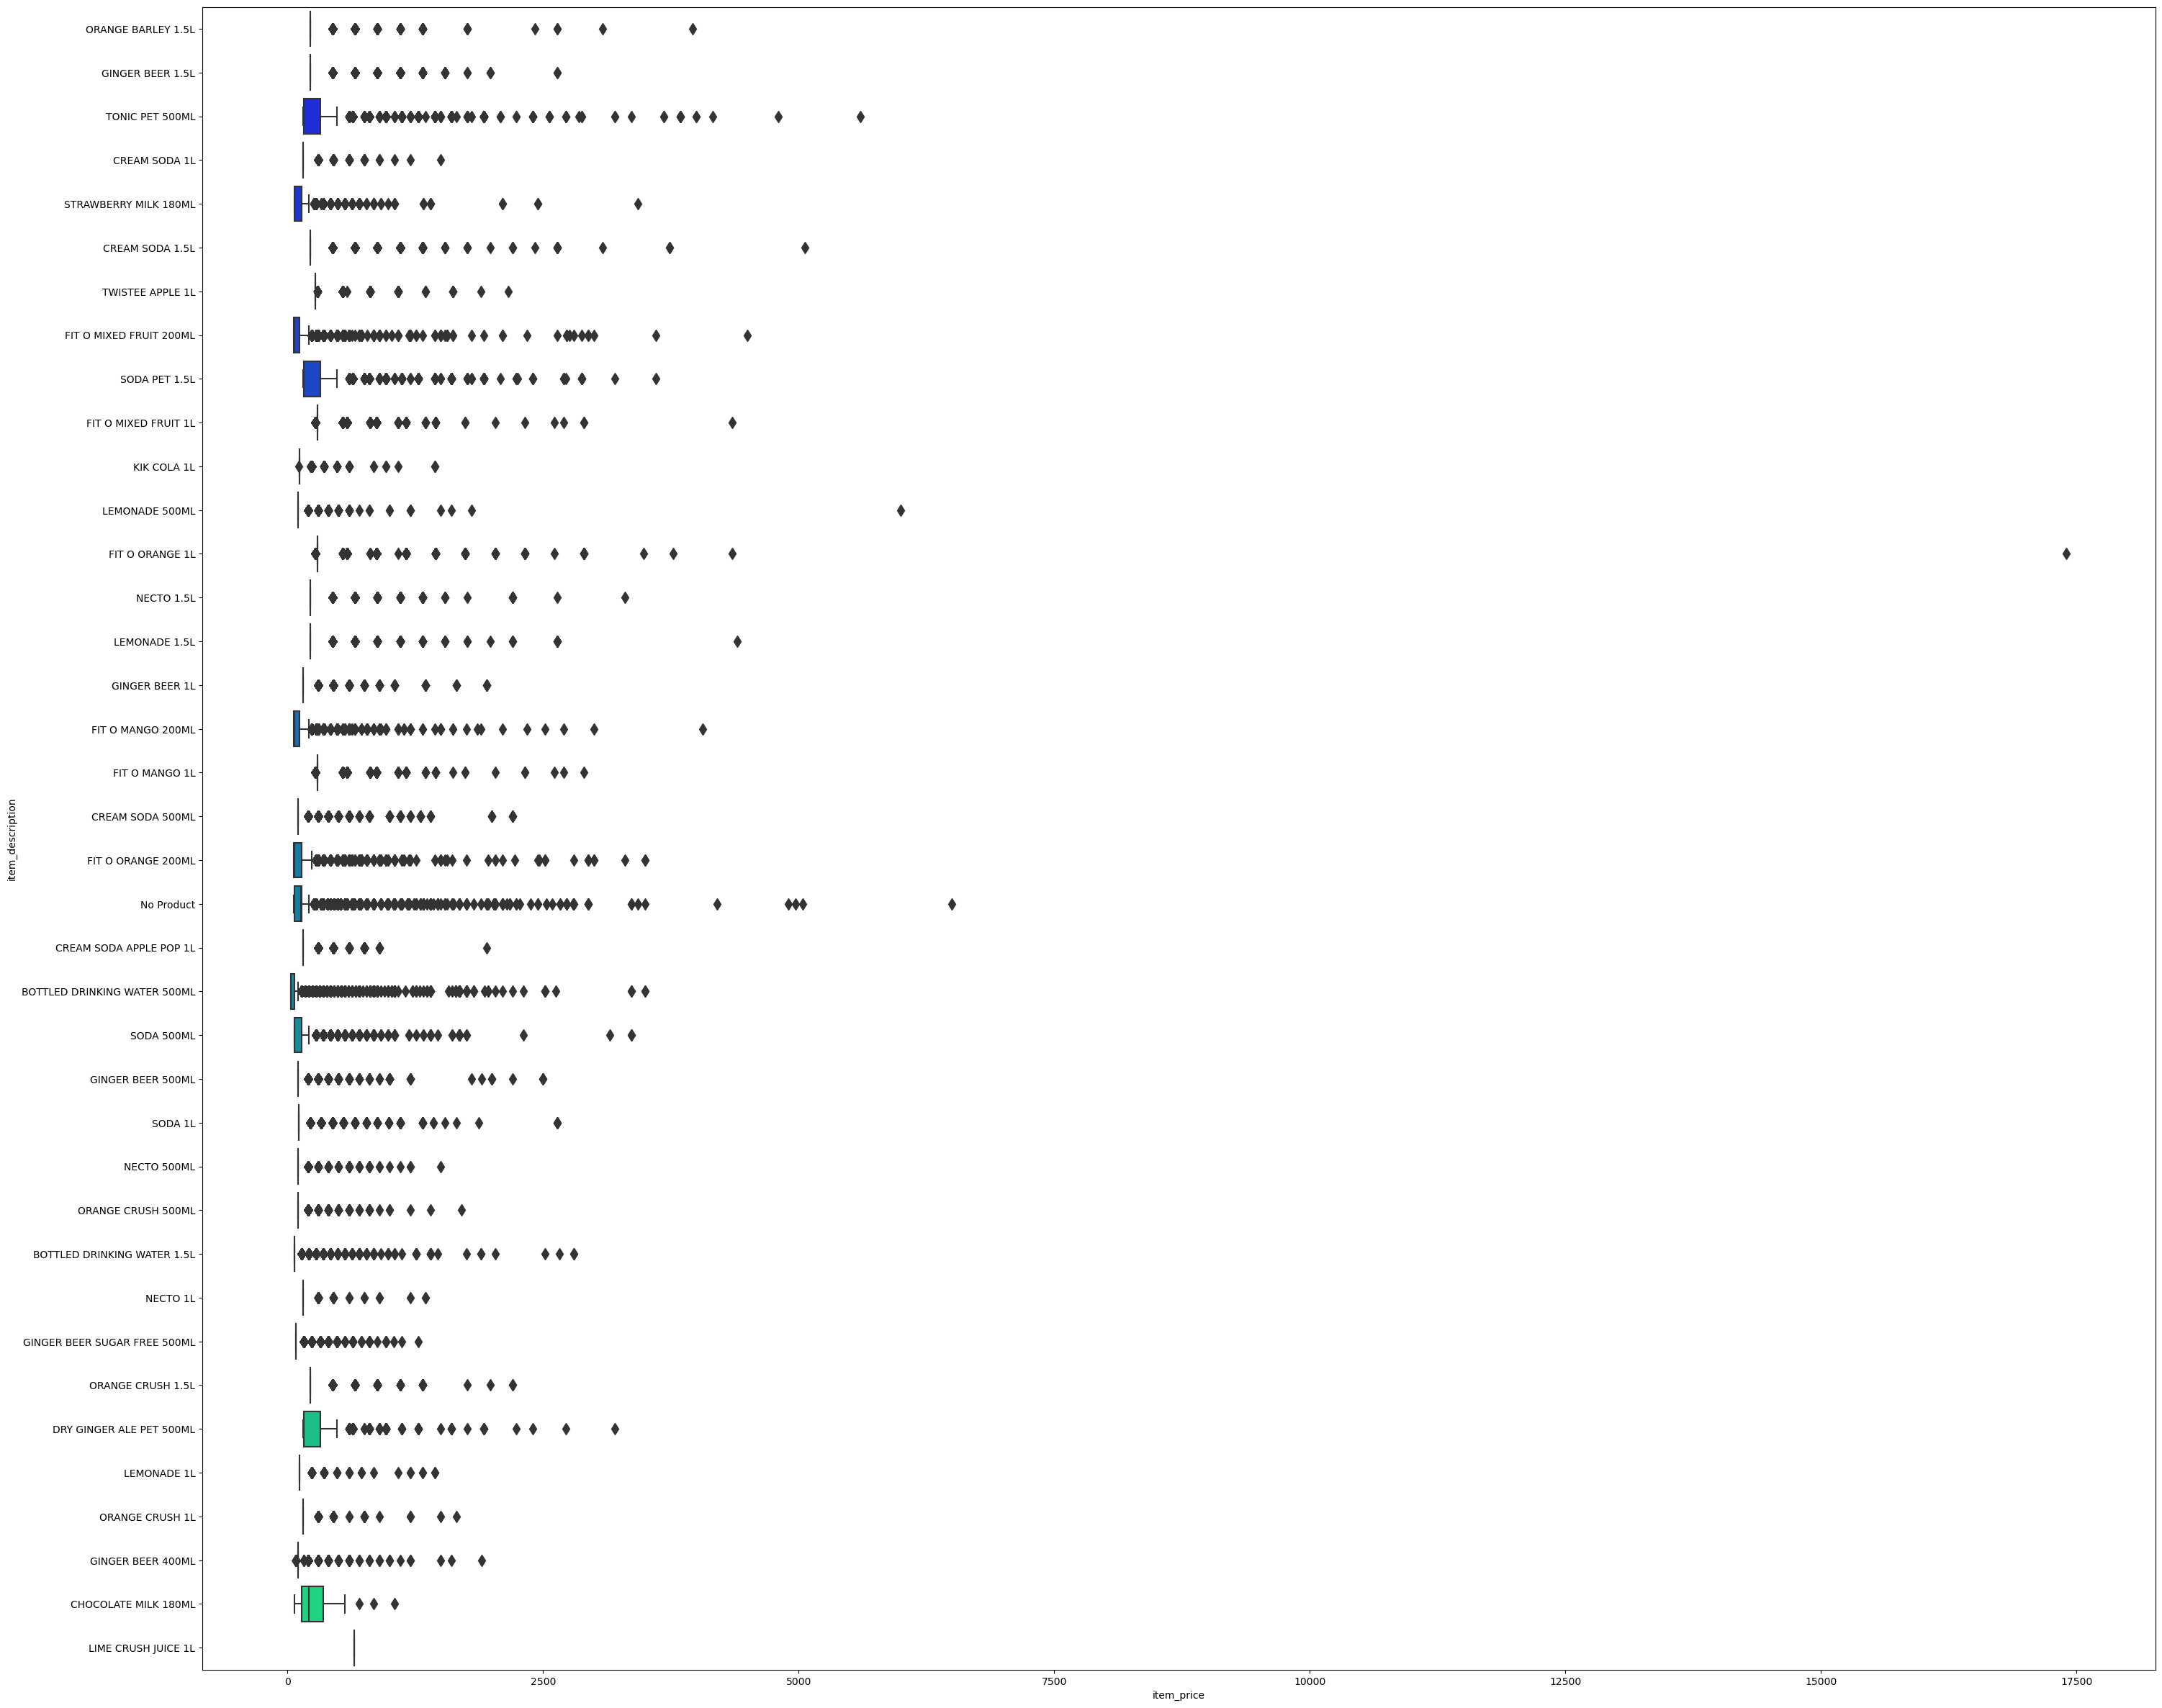

In [13]:
plt.figure(figsize=(35, 30))

sns.boxplot(y='item_description',x = 'item_price',data=df_transactions,palette='winter' ,fliersize=8)

### Item Wise Remove the Outliers Using Capping 

In [14]:
products_list = df_transactions.item_description.unique()
products_list

array(['ORANGE BARLEY 1.5L', 'GINGER BEER 1.5L', 'TONIC PET 500ML',
       'CREAM SODA 1L', 'STRAWBERRY MILK 180ML', 'CREAM SODA 1.5L',
       'TWISTEE APPLE 1L', 'FIT O MIXED FRUIT 200ML', 'SODA PET 1.5L',
       'FIT O MIXED FRUIT 1L', 'KIK COLA 1L', 'LEMONADE 500ML',
       'FIT O ORANGE 1L', 'NECTO 1.5L', 'LEMONADE 1.5L', 'GINGER BEER 1L',
       'FIT O MANGO 200ML', 'FIT O MANGO 1L', 'CREAM SODA 500ML',
       'FIT O ORANGE 200ML', 'No Product', 'CREAM SODA APPLE POP 1L',
       'BOTTLED DRINKING WATER 500ML', 'SODA 500ML', 'GINGER BEER 500ML',
       'SODA 1L', 'NECTO 500ML', 'ORANGE CRUSH 500ML',
       'BOTTLED DRINKING WATER 1.5L', 'NECTO 1L',
       'GINGER BEER SUGAR FREE 500ML', 'ORANGE CRUSH 1.5L',
       'DRY GINGER ALE PET 500ML', 'LEMONADE 1L', 'ORANGE CRUSH 1L',
       'GINGER BEER 400ML', 'CHOCOLATE MILK 180ML', 'LIME CRUSH JUICE 1L'],
      dtype=object)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='item_price', ylabel='item_description'>

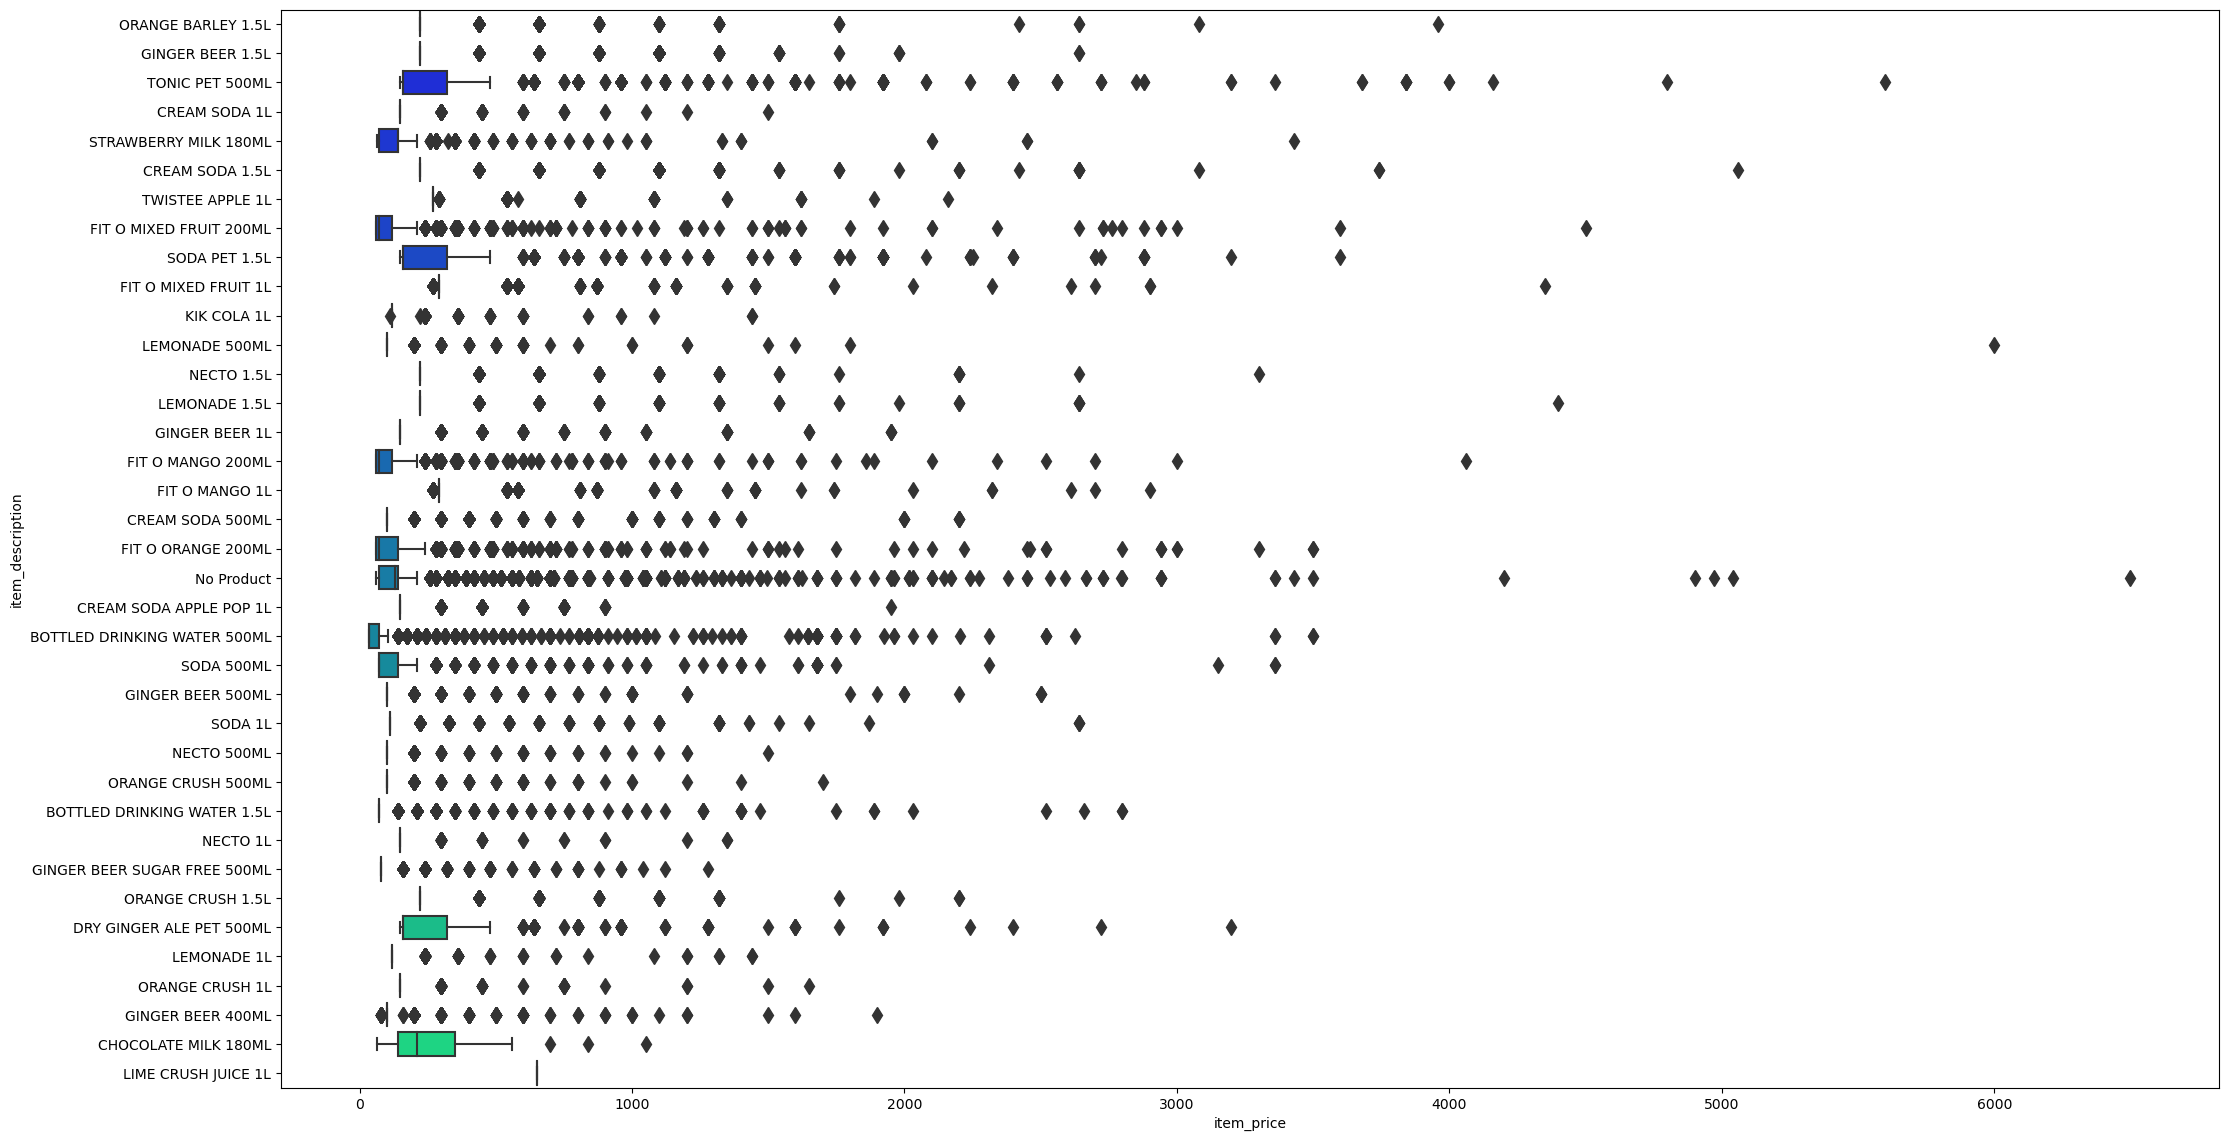

In [15]:
df_test = df_transactions.copy()

for product in products_list:
    df_temp = df_test[df_test['item_description'] == product]
    q95 = df_temp['item_price'].quantile(0.90)
    df_temp['item_price'] = df_temp['item_price'].apply( lambda x: x if x<=q95 else q95 )
    df_test[df_test['item_description'] == products_list[12]] = df_temp
    
plt.figure(figsize=(25, 14))
sns.boxplot(y='item_description',x = 'item_price',data=df_test,palette='winter' ,fliersize=8)


<AxesSubplot:xlabel='item_price', ylabel='item_description'>

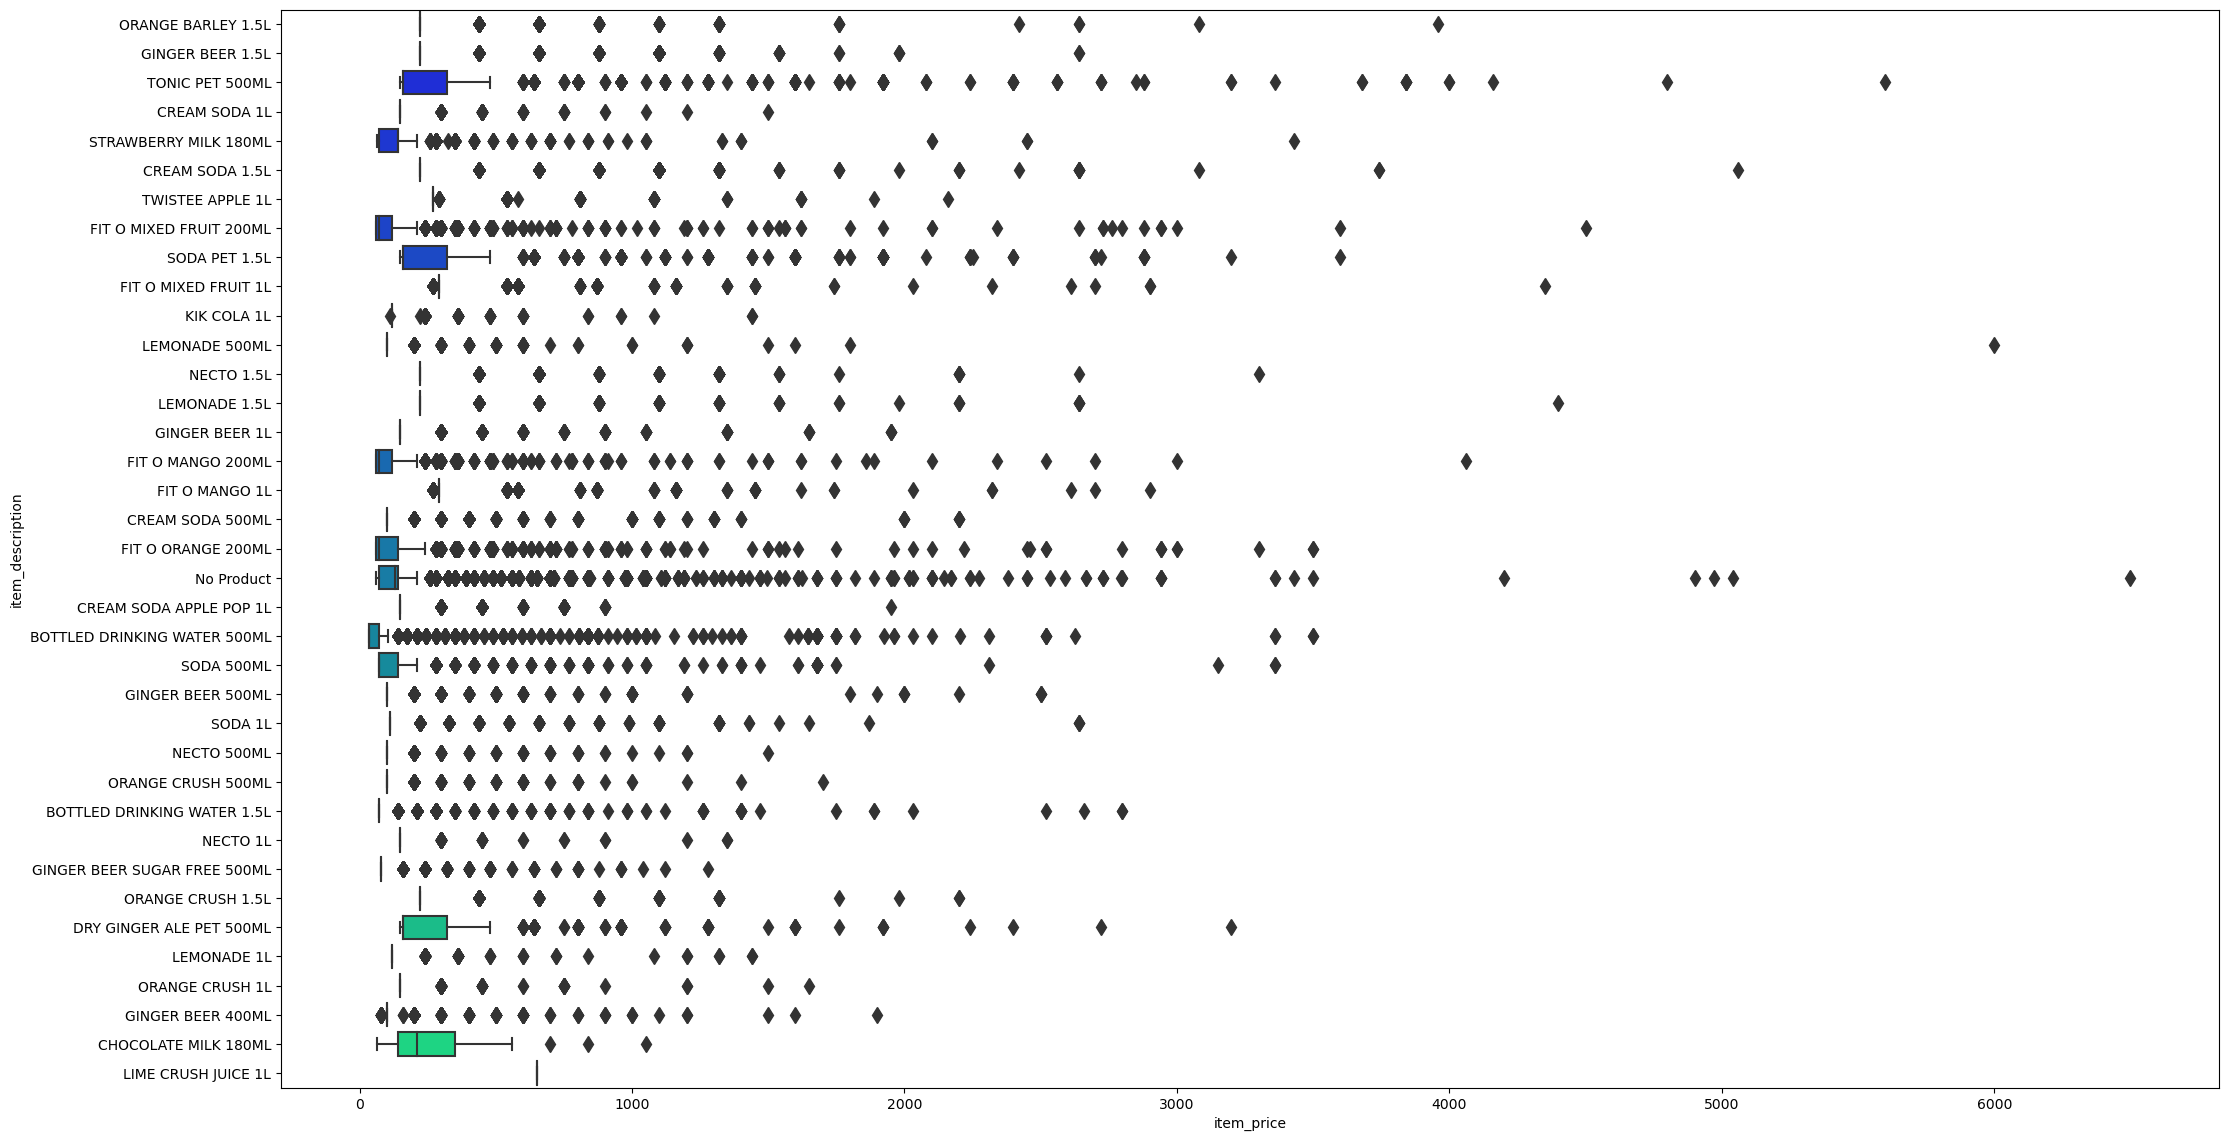

In [16]:
df_transactions = df_test
plt.figure(figsize=(25, 14))
sns.boxplot(y='item_description',x = 'item_price',data=df_transactions,palette='winter' ,fliersize=8)


In [17]:
df_transactions.head(100)

item_description          transaction_date  invoice_id customer_id  \
0      ORANGE BARLEY 1.5L  2021-12-11T00:00:00.000Z       147.0        BGXA   
1        GINGER BEER 1.5L  2021-10-17T00:00:00.000Z       371.0        IA25   
2         TONIC PET 500ML  2021-12-13T00:00:00.000Z       484.0        VN7V   
3           CREAM SODA 1L  2021-12-13T00:00:00.000Z       484.0        VN7V   
4   STRAWBERRY MILK 180ML  2021-10-23T00:00:00.000Z      1310.0        7S00   
..                    ...                       ...         ...         ...   
95                    NaN                       NaN         NaN         NaN   
96       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
97       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
98       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
99       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   

    shop_id  item_price  quantity_sold  
0   SHOP008       220.0            2.0  
1   SHOP112       220.0            2.0  
2   SHOP008       160.0            2.0  
3   SHOP008       150.0            2.0  
4   SHOP112       210.0            5.0  
..      ...         ...            ...  
95      NaN         NaN            NaN  
96  SHOP022       100.0            1.0  
97  SHOP022       100.0            2.0  
98  SHOP022       100.0            2.0  
99  SHOP022       100.0            1.0  

[100 rows x 7 columns]

<AxesSubplot:xlabel='quantity_sold', ylabel='item_description'>

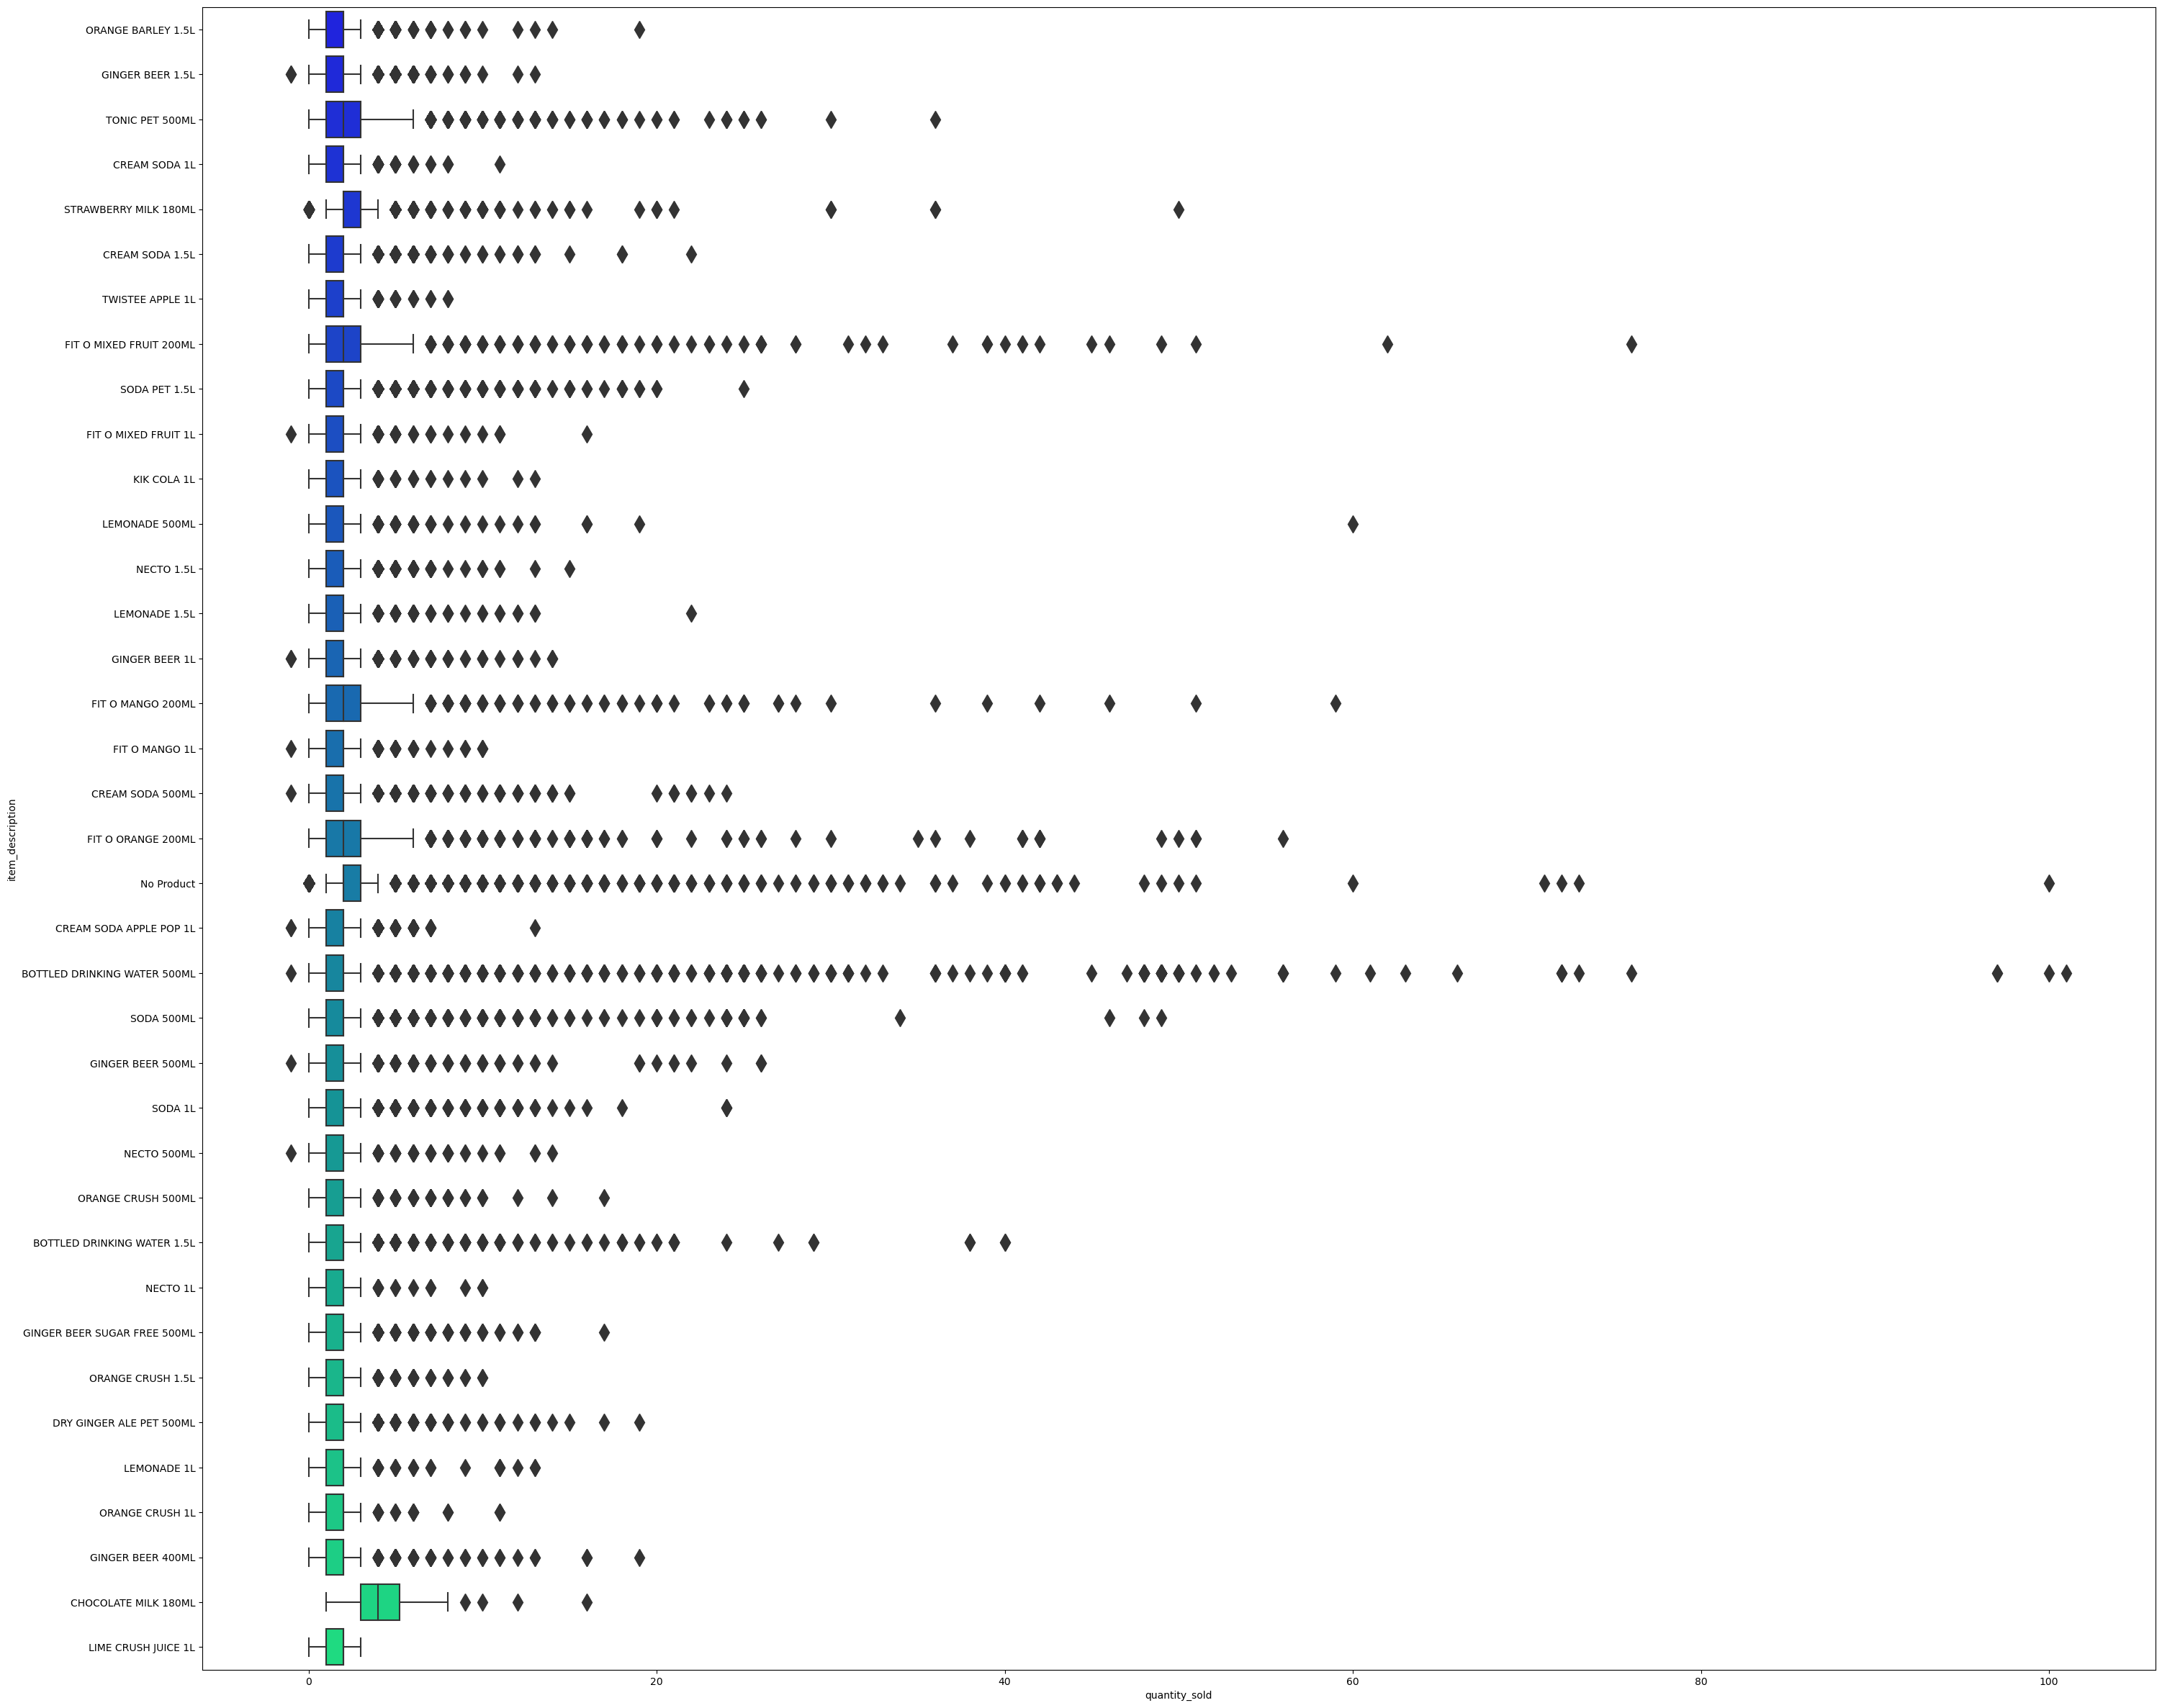

In [18]:
plt.figure(figsize=(35, 30))
sns.boxplot(y='item_description',x='quantity_sold',data=df_transactions,palette='winter' ,  fliersize=12)

In [19]:
## Make the Quantity Sold Ones 0 remove -1 
df_transactions['quantity_sold'] = df_transactions['quantity_sold'].apply( lambda x: x if x>=0 else 0 )

<AxesSubplot:xlabel='quantity_sold', ylabel='item_description'>

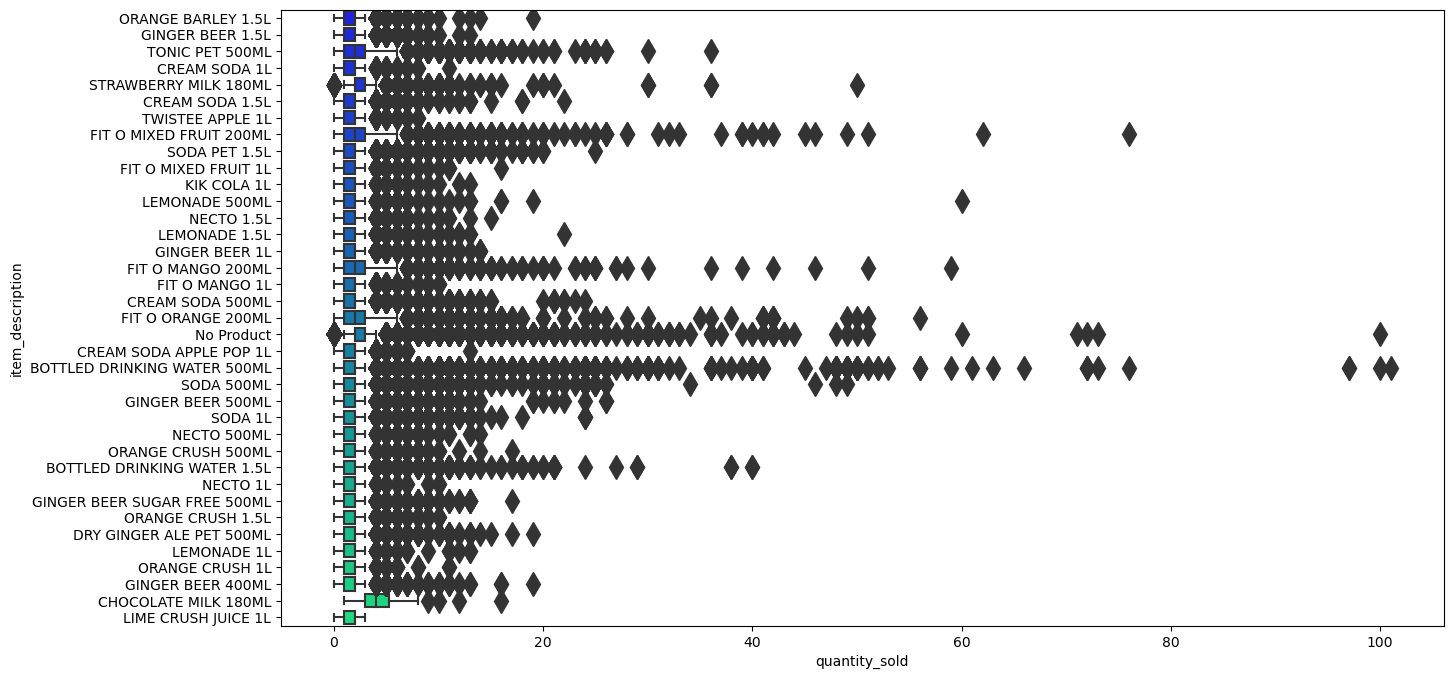

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='item_description',x='quantity_sold',data=df_transactions,palette='winter',  fliersize=12
           )

In [21]:
## Find the Total Sold Products of Each Category Across All Shops.

df_item_quanitity = df_transactions.groupby('item_description')['quantity_sold'].sum()
df_item_quanitity


item_description
BOTTLED DRINKING WATER 1.5L      18567.0
BOTTLED DRINKING WATER 500ML     42803.0
CHOCOLATE MILK 180ML               180.0
CREAM SODA 1.5L                  72585.0
CREAM SODA 1L                     5908.0
CREAM SODA 500ML                 57540.0
CREAM SODA APPLE POP 1L          20326.0
DRY GINGER ALE PET 500ML         12103.0
FIT O MANGO 1L                   10967.0
FIT O MANGO 200ML                15093.0
FIT O MIXED FRUIT 1L             11974.0
FIT O MIXED FRUIT 200ML          18514.0
FIT O ORANGE 200ML               23441.0
GINGER BEER 1.5L                101821.0
GINGER BEER 1L                   43231.0
GINGER BEER 400ML                 5901.0
GINGER BEER 500ML                20926.0
GINGER BEER SUGAR FREE 500ML     11141.0
KIK COLA 1L                       4045.0
LEMONADE 1.5L                    22051.0
LEMONADE 1L                       3616.0
LEMONADE 500ML                   10877.0
LIME CRUSH JUICE 1L                121.0
NECTO 1.5L                       39574.0

## Feature Engineering 

In [22]:
df_transactions = df_transactions.assign(Total = lambda x: (x['item_price']* x['quantity_sold']))
df_transactions.head(100)

item_description          transaction_date  invoice_id customer_id  \
0      ORANGE BARLEY 1.5L  2021-12-11T00:00:00.000Z       147.0        BGXA   
1        GINGER BEER 1.5L  2021-10-17T00:00:00.000Z       371.0        IA25   
2         TONIC PET 500ML  2021-12-13T00:00:00.000Z       484.0        VN7V   
3           CREAM SODA 1L  2021-12-13T00:00:00.000Z       484.0        VN7V   
4   STRAWBERRY MILK 180ML  2021-10-23T00:00:00.000Z      1310.0        7S00   
..                    ...                       ...         ...         ...   
95                    NaN                       NaN         NaN         NaN   
96       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
97       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
98       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   
99       CREAM SODA 500ML  2021-10-23T00:00:00.000Z     31232.0        G6IW   

    shop_id  item_price  quantity_sold   Total  
0   SHOP008       220.0            2.0   440.0  
1   SHOP112       220.0            2.0   440.0  
2   SHOP008       160.0            2.0   320.0  
3   SHOP008       150.0            2.0   300.0  
4   SHOP112       210.0            5.0  1050.0  
..      ...         ...            ...     ...  
95      NaN         NaN            0.0     NaN  
96  SHOP022       100.0            1.0   100.0  
97  SHOP022       100.0            2.0   200.0  
98  SHOP022       100.0            2.0   200.0  
99  SHOP022       100.0            1.0   100.0  

[100 rows x 8 columns]

In [23]:
#data.timestamp = pd.to_datetime(data.timestamp, infer_datetime_format = True, utc = True).astype('datetime64[ns]')

df_transactions.transaction_date = pd.to_datetime(df_transactions.transaction_date, infer_datetime_format = True, utc = True).astype('datetime64[ns]')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
def get_month(date):
    #print(date)
    return date.month

df_transactions['Month'] = df_transactions.apply(lambda row: get_month(row['transaction_date']), axis=1)

## Analysing the Shop Sales

In [25]:
df_shop_total = df_transactions.groupby('shop_id')['Total'].sum()
df_shop_total

shop_id
SHOP001    1435735.0
SHOP002    3028485.0
SHOP003    1847075.0
SHOP004    1502700.0
SHOP005    2006830.0
             ...    
SHOP123     936185.0
SHOP124    2803730.0
SHOP125    1279885.0
SHOP126    1819655.0
SHOP127    3832295.0
Name: Total, Length: 124, dtype: float64

In [26]:
df_shop_max_item_price = df_transactions.groupby('shop_id')['item_price'].max()
df_shop_max_item_price


shop_id
SHOP001    5040.0
SHOP002    2880.0
SHOP003    1870.0
SHOP004    1280.0
SHOP005    2900.0
            ...  
SHOP123    1330.0
SHOP124    6000.0
SHOP125    1600.0
SHOP126    2500.0
SHOP127    4900.0
Name: item_price, Length: 124, dtype: float64

In [27]:
df_shop_min_quantity = df_transactions.groupby('shop_id')['quantity_sold'].min()
df_shop_min_quantity



shop_id
SHOP001    0.0
SHOP002    0.0
SHOP003    0.0
SHOP004    0.0
SHOP005    0.0
          ... 
SHOP123    0.0
SHOP124    0.0
SHOP125    0.0
SHOP126    0.0
SHOP127    0.0
Name: quantity_sold, Length: 124, dtype: float64

In [28]:
df_shop_max_quantity = df_transactions.groupby('shop_id')['quantity_sold'].max()
df_shop_max_quantity


shop_id
SHOP001    73.0
SHOP002    49.0
SHOP003    20.0
SHOP004    20.0
SHOP005    43.0
           ... 
SHOP123    39.0
SHOP124    60.0
SHOP125    30.0
SHOP126    36.0
SHOP127    71.0
Name: quantity_sold, Length: 124, dtype: float64

In [29]:
pd.set_option('display.max_rows', None)
# finding the Shops that had the Highest Sales in a Single Day.
df_shop_max_per_day_sales = df_transactions.groupby(['transaction_date','shop_id'])['Total'].sum().groupby(['shop_id']).max()
df_shop_max_per_day_sales

shop_id
SHOP001    376725.0
SHOP002    167510.0
SHOP003     90480.0
SHOP004     63815.0
SHOP005    172770.0
SHOP006     83870.0
SHOP007    224125.0
SHOP008     64015.0
SHOP009     81440.0
SHOP010     62710.0
SHOP011    290715.0
SHOP012    181320.0
SHOP013    210490.0
SHOP014    162985.0
SHOP015     57890.0
SHOP016    245465.0
SHOP017     88210.0
SHOP018    487455.0
SHOP019     95210.0
SHOP020    120770.0
SHOP021     76305.0
SHOP022    384430.0
SHOP023    177850.0
SHOP024     62825.0
SHOP025     81595.0
SHOP026    136895.0
SHOP027    106095.0
SHOP028    193145.0
SHOP029     75360.0
SHOP030    253795.0
SHOP031    357590.0
SHOP032     57760.0
SHOP033    211275.0
SHOP034    111910.0
SHOP035     72055.0
SHOP036     96645.0
SHOP037    115565.0
SHOP038     80805.0
SHOP039    213940.0
SHOP040    142890.0
SHOP041     79400.0
SHOP042     69185.0
SHOP043    156395.0
SHOP044     83120.0
SHOP045    107770.0
SHOP046    414130.0
SHOP047     71015.0
SHOP048    261365.0
SHOP049     85525.0
SHOP050    1

In [30]:
print("GRACE")

GRACE


## Analysing the Customer Behaviours 

In [31]:
df_highest_speding_customers = df_transactions.groupby('customer_id')['Total'].sum()
df_highest_speding_customers


customer_id
0.00E+00       7550.0
000S           2120.0
001E           1830.0
001T           1400.0
002A            160.0
002B            485.0
002D            420.0
002M            220.0
003A           3080.0
003I           1220.0
003X            140.0
004B            540.0
004K            440.0
004T            900.0
005Z           1990.0
006C            200.0
006L            440.0
006T            320.0
006U            465.0
006Z             70.0
007N            880.0
007Q            540.0
007Z            295.0
008C            640.0
008S              0.0
008W           1285.0
009A           1630.0
009Q            440.0
009T            220.0
009W           5370.0
009Z           1010.0
00AQ            280.0
00B7            220.0
00BB            220.0
00BL            220.0
00BM            790.0
00C0           3780.0
00C3            320.0
00CA            130.0
00CG            160.0
00CI            560.0
00CK            220.0
00CM            420.0
00D5            360.0
00DD            220.

In [32]:
df_transactions.head(100)

item_description transaction_date  invoice_id customer_id  \
0             ORANGE BARLEY 1.5L       2021-12-11       147.0        BGXA   
1               GINGER BEER 1.5L       2021-10-17       371.0        IA25   
2                TONIC PET 500ML       2021-12-13       484.0        VN7V   
3                  CREAM SODA 1L       2021-12-13       484.0        VN7V   
4          STRAWBERRY MILK 180ML       2021-10-23      1310.0        7S00   
5                  CREAM SODA 1L       2021-10-30      1624.0        KZB3   
6                CREAM SODA 1.5L       2021-10-28      2024.0        0PDI   
7               TWISTEE APPLE 1L       2021-10-31      2521.0        7OPC   
8        FIT O MIXED FRUIT 200ML       2021-11-04      3223.0        ETXL   
9                  SODA PET 1.5L       2021-11-08      3555.0        JSGV   
10       FIT O MIXED FRUIT 200ML       2021-11-12      4222.0        PH98   
11          FIT O MIXED FRUIT 1L       2021-11-12      4222.0        PH98   
12          FIT O MIXED FRUIT 1L       2021-11-12      4613.0        AAV4   
13                   KIK COLA 1L       2021-11-15      4932.0        4Q2Z   
14              GINGER BEER 1.5L       2021-11-16      5347.0        MO22   
15          FIT O MIXED FRUIT 1L       2021-11-23      6507.0        3M73   
16               CREAM SODA 1.5L       2021-11-29      7670.0        OA3U   
17                LEMONADE 500ML       2021-12-01      7946.0        ZYJ7   
18                           NaN              NaT         NaN         NaN   
19              GINGER BEER 1.5L       2021-12-03      8365.0        QRCS   
20               CREAM SODA 1.5L       2021-12-05      8675.0        QY7K   
21              GINGER BEER 1.5L       2021-12-05      8675.0        QY7K   
22         STRAWBERRY MILK 180ML       2021-12-05      8675.0        QY7K   
23                    NECTO 1.5L       2021-12-05      8675.0        QY7K   
24                 LEMONADE 1.5L       2021-12-05      8675.0        QY7K   
25                    NECTO 1.5L       2021-12-06      9334.0        GRV6   
26               CREAM SODA 1.5L       2021-12-06      9334.0        GRV6   
27                GINGER BEER 1L       2021-12-12     10349.0        07CT   
28                GINGER BEER 1L       2021-12-12     10349.0        07CT   
29                GINGER BEER 1L       2021-12-12     10349.0        07CT   
30                GINGER BEER 1L       2021-12-12     10349.0        07CT   
31             FIT O MANGO 200ML       2021-12-14     10762.0        K0PZ   
32                 SODA PET 1.5L       2021-12-14     11108.0        AN7O   
33            ORANGE BARLEY 1.5L       2021-10-18     13789.0        K43U   
34               CREAM SODA 1.5L       2021-10-20     14215.0        NIVY   
35                FIT O MANGO 1L       2021-10-25     15186.0        YQHH   
36              CREAM SODA 500ML       2021-10-26     15354.0        UWKU   
37              CREAM SODA 500ML       2021-10-26     15354.0        UWKU   
38              CREAM SODA 500ML       2021-10-26     15354.0        UWKU   
39              CREAM SODA 500ML       2021-10-26     15354.0        UWKU   
40                           NaN              NaT         NaN         NaN   
41            ORANGE BARLEY 1.5L       2021-11-13     19274.0        HZFN   
42              GINGER BEER 1.5L       2021-11-21     20890.0        WLN9   
43            FIT O ORANGE 200ML       2021-11-23     21190.0        513E   
44         STRAWBERRY MILK 180ML       2021-11-25     21419.0        A8P1   
45               CREAM SODA 1.5L       2021-11-26     21782.0        N3ZN   
46                    No Product       2021-10-17     21853.0        UXT7   
47       CREAM SODA APPLE POP 1L       2021-11-27     21966.0        RQZB   
48  BOTTLED DRINKING WATER 500ML       2021-10-22     22584.0        6Q7T   
49            ORANGE BARLEY 1.5L       2021-10-26     23094.0        XBP5   
50       CREAM SODA APPLE POP 1L       2021-12-07     23947.0        LKED   
51          

In [33]:
df_shop_highest_speding_customers = df_transactions.groupby('shop_id', 'customer_id')['Total'].sum()
df_shop_highest_speding_customers

ValueError: No axis named customer_id for object type DataFrame

In [67]:
df_shop_month_sales = df_transactions.groupby(['Month','shop_id'])['Total'].sum().to_frame()
df_shop_month_sales['Total'].keys()[0]



(10.0, 'SHOP001')

In [82]:
df_shop_month_sales

Total
Month shop_id           
10.0  SHOP001   304035.0
      SHOP002   742165.0
      SHOP003   503425.0
      SHOP004   399025.0
      SHOP005   620700.0
      SHOP006   490160.0
      SHOP007   534225.0
      SHOP009   573855.0
      SHOP010   555085.0
      SHOP011   873010.0
      SHOP012   228660.0
      SHOP013   550970.0
      SHOP014   519860.0
      SHOP015   378295.0
      SHOP016   999175.0
      SHOP017   457620.0
      SHOP018  1400320.0
      SHOP019   563915.0
      SHOP020   706840.0
      SHOP021   503270.0
      SHOP022   518195.0
      SHOP023   919905.0
      SHOP024   323165.0
      SHOP025   555950.0
      SHOP026   649545.0
      SHOP027   378660.0
      SHOP028   473690.0
      SHOP029   482170.0
      SHOP030  1102120.0
      SHOP031   963755.0
      SHOP032   401930.0
      SHOP033   812345.0
      SHOP034   301100.0
      SHOP035   386745.0
      SHOP036   583715.0
      SHOP037   479565.0
      SHOP038   382690.0
      SHOP039   959370.0
      SHOP040   546980.0
      SHOP041   440520.0
      SHOP042   375610.0
      SHOP043   800665.0
      SHOP044   341275.0
      SHOP045   682670.0
      SHOP046   546915.0
      SHOP047   298515.0
      SHOP048   539220.0
      SHOP049   510420.0
      SHOP050   640965.0
      SHOP051   671290.0
      SHOP052   599750.0
      SHOP053   568505.0
      SHOP054   763795.0
      SHOP055   199680.0
      SHOP056   856745.0
      SHOP057   437825.0
      SHOP058  1319180.0
      SHOP059   530455.0
      SHOP060   459475.0
      SHOP061   452365.0
      SHOP062   440485.0
      SHOP063   651180.0
      SHOP065   470395.0
      SHOP066   507670.0
      SHOP067   564725.0
      SHOP068   657975.0
      SHOP069   553400.0
      SHOP070   308315.0
      SHOP071   250275.0
      SHOP072   802435.0
      SHOP073   420220.0
      SHOP074   773145.0
      SHOP075   580250.0
      SHOP076   542070.0
      SHOP077   740410.0
      SHOP078   846330.0
      SHOP079   691215.0
      SHOP080   301370.0
      SHOP081   807145.0
      SHOP082   811615.0
      SHOP083   539340.0
      SHOP084   764430.0
      SHOP085   492485.0
      SHOP086   720835.0
      SHOP087   293305.0
      SHOP088   535540.0
      SHOP089   537190.0
      SHOP090   250185.0
      SHOP091   681045.0
      SHOP092   488685.0
      SHOP093   799850.0
      SHOP094   582585.0
      SHOP095   356805.0
      SHOP096   669395.0
      SHOP097   622185.0
      SHOP098   648325.0
      SHOP099   649710.0
      SHOP100   895480.0
      SHOP101   672270.0
      SHOP102   473950.0
      SHOP103   461085.0
      SHOP104   425015.0
      SHOP105   460035.0
      SHOP106   535130.0
      SHOP107   675295.0
      SHOP108   621325.0
      SHOP111   965735.0
      SHOP112   369225.0
      SHOP113  1027530.0
      SHOP114   540250.0
      SHOP115   316010.0
      SHOP116   814675.0
      SHOP117   605695.0
      SHOP118   793470.0
      SHOP119   428685.0
      SHOP120   324365.0
      SHOP121   830490.0
      SHOP122   450625.0
      SHOP123   318385.0
      SHOP124   681225.0
      SHOP125   255905.0
      SHOP126   690975.0
      SHOP127  1149380.0
11.0  SHOP001   777895.0
      SHOP002  1202990.0
      SHOP003   668070.0
      SHOP004   554615.0
      SHOP005   877400.0
      SHOP006   765930.0
      SHOP007   772395.0
      SHOP009   669590.0
      SHOP010   718825.0
      SHOP011  1579050.0
      SHOP012   410535.0
      SHOP013   997670.0
      SHOP014   766835.0
      SHOP015   467440.0
      SHOP016  1620630.0
      SHOP017   662335.0
      SHOP018  2153295.0
      SHOP019   819835.0
      SHOP020  1046110.0
      SHOP021   654180.0
      SHOP022  1077540.0
      SHOP023   961625.0
      SHOP024   565895.0
      SHOP025   530000.0
      SHOP026   660255.0
      SHOP027   677465.0
      SHOP028   825180.0
      SHOP029   785130.0
      SHOP030   843455.0
      SHOP031  1492900.0
      SHOP032   513560.0
      SHOP033  1142085.0
      SHOP034   490565.0
      SHOP035   546095.0
      SHOP036   849375.0
      SHOP037   740

In [81]:
df_shop_month_sales['Total'][(10.0)][('SHOP008')]

KeyError: 'SHOP008'

In [80]:
#df_transactions['Month'] = df_transactions.apply(lambda row: get_month(row['transaction_date']), axis=1)

df_store_info['Month10Total'] =  df_store_info.apply(lambda row: df_shop_month_sales['Total'][(10.0)][(row['shop_id'])], axis=1)

#df_store_info['Month10Total'] = df_shop_month_sales['Total'][(10.0)]
df_store_info

KeyError: 'SHOP008'